In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

np.random.seed(0)

In [3]:
# load dataset
california_housing = fetch_california_housing(as_frame=True)

In [4]:
# view dataset description
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [85]:
# take a look at some data
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
# generate basic statistics
california_housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


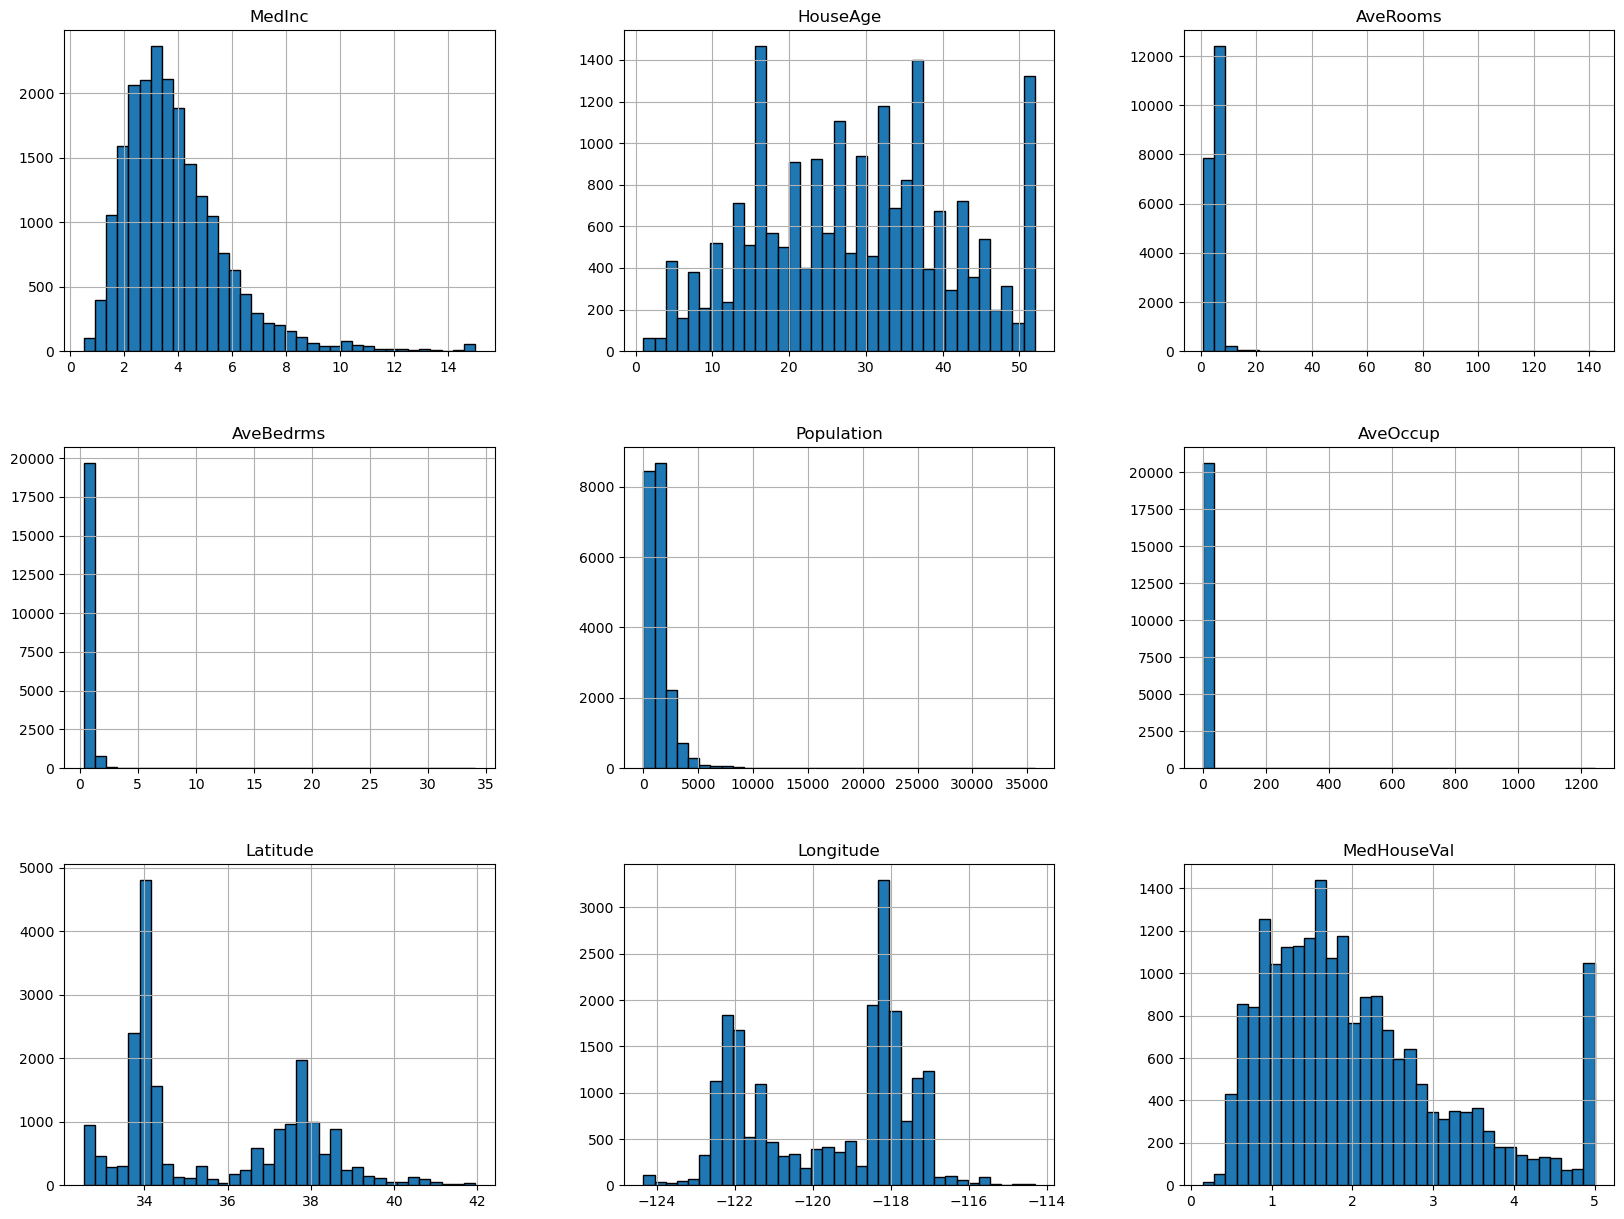

In [22]:
# plot histograms of all features
california_housing.frame.hist(figsize=(20, 15), bins=35, edgecolor="black");

In [192]:
# calculate correlation matrix
california_housing.frame.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


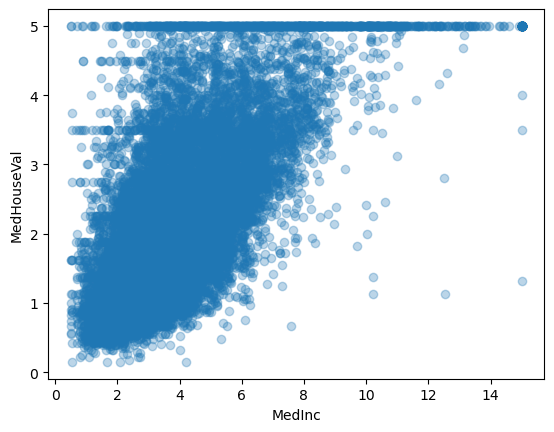

In [193]:
# plot house prices against household income
xs = california_housing.frame["MedInc"]
ys = california_housing.frame["MedHouseVal"]
plt.scatter(xs, ys, alpha=0.3)
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal");

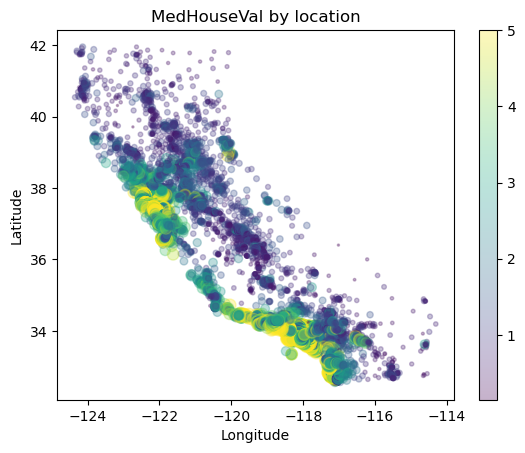

In [194]:
# plot house prices by location
xs = california_housing.frame["Longitude"]
ys = california_housing.frame["Latitude"]
zs = california_housing.frame["MedHouseVal"]
plt.scatter(xs, ys, s=zs*15, c=zs, alpha=0.3)
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("MedHouseVal by location");

In [128]:
# normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(california_housing.data)

# spit data into train and test sets
y = california_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [173]:
# Crteate and train random forest
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 6).fit(X_train, y_train)

In [174]:
# Make predictions from test set and calculate mse, rmse, r2
prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)
print(mse)
print(rmse)
print(r2)

0.44251598482696913
0.6652187496056986
0.6606355142793543


In [168]:
# use cross-validation for model evaluation
mses = cross_val_score(rf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmses = np.sqrt(-mses)
print(rmses)

[0.5185946  0.49784324 0.49996131 0.49462525 0.52901087 0.50078495
 0.49147078 0.48997816 0.52132937 0.46865005]


In [170]:
r2s = cross_val_score(rf, X_train, y_train, scoring="r2", cv=10)
print(r2s)

[0.8051587  0.81365445 0.81493136 0.81747659 0.79548318 0.81724741
 0.81147002 0.82146739 0.78634338 0.83516316]


In [ ]:
# use gridsearch to find the best combination of hyperparameters
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2',4],
    'max_depth' : [10,15,20],
    'random_state': 0
}
CV_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 10)
CV_rf.fit(X_train, y_train)

In [181]:
CV_rf.best_params_

{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 300}

In [182]:
# Create and train a random forest with the best hyperparameters
rf = RandomForestRegressor(n_estimators = 300, max_features = 'log2', max_depth = 20).fit(X_train, y_train)

In [183]:
# Make predictions from test set and calculate mse, rmse, r2
prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)
print(mse)
print(rmse)
print(r2)

0.23601165810847327
0.48581031082972426
0.8190032050268716


In [184]:
# use cross-validation for model evaluation
mses = cross_val_score(rf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmses = np.sqrt(-mses)
print(rmses)

[0.51531596 0.49499112 0.48936211 0.48201747 0.51516048 0.4889905
 0.47643959 0.48200778 0.51419857 0.45566088]


In [185]:
r2s = cross_val_score(rf, X_train, y_train, scoring="r2", cv=10)
print(r2s)

[0.80926263 0.81991986 0.82268637 0.82941484 0.80607288 0.82782764
 0.82167604 0.82736226 0.79271657 0.84394131]


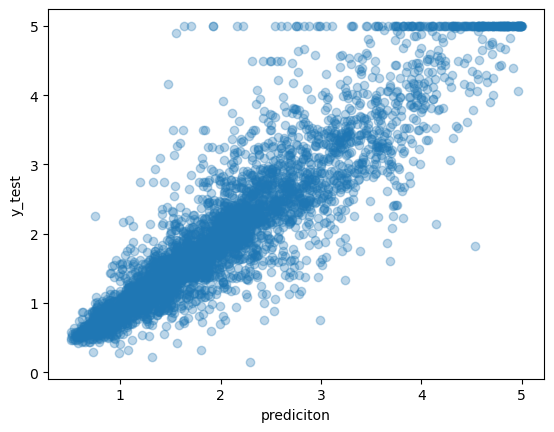

In [186]:
# plot predicted values against target values
plt.scatter(prediction, y_test, alpha=0.3)
plt.xlabel("prediciton")
plt.ylabel("y_test");

Text(0.5, 0, 'Feature Importance')

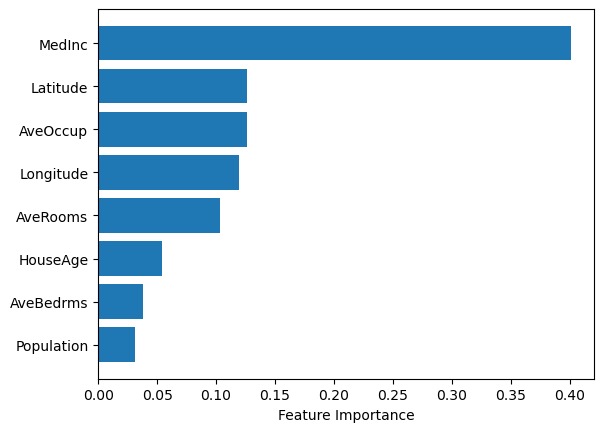

In [216]:
# identify most influential features
feature_names = california_housing.data.columns.values.tolist()
feature_importances = rf.feature_importances_
df = pd.DataFrame(
    dict(
        names = feature_names,
        importances = feature_importances
    )
)
df.sort_values('importances', inplace=True)
plt.barh('names', 'importances', data=df)
plt.xlabel("Feature Importance")